<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment_2_3/a2_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Number:

# Student 1: Kaiting Liu

# Student 2: Sihan Zhu

# Student 3: Ruozhu Yao

# Downloading Data and Preliminaries

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from zipfile import ZipFile
import requests
import io

In [2]:
def load_zip(url):
    response = requests.get(url)
    response.raise_for_status()
    zipf = ZipFile(io.BytesIO(response.content))
    return {name: zipf.read(name) for name in zipf.namelist()}

def load_array(zipfile, fn):
    return np.load(io.BytesIO(zipfile[fn]))

In [3]:
"""
This cell loads the training, validation or test data as numpy arrays,
with the positions, initial velocities and charge data of the particles.

The position arrays are shaped as
[simulation id, time point (corresponding to t = 0, 0.5, 1 or 1.5), x/y spatial dimension, particle id].

The initial velocity arrays are shaped as
[simulation id, 1 (corresponding to t=0), x/y spatial dimension, particle id].

The charge arrays are shaped as [simulation id, particle id, 1]

"""

data = load_zip('https://surfdrive.surf.nl/files/index.php/s/OIgda2ZRG8v0eqB/download')

features = ['positions', 'velocities', 'charges']
    
positions_train, velocities_train, charges_train = (load_array(data, f'data/train/{f}.npy') for f in features)
positions_valid, velocities_valid, charges_valid = (load_array(data, f'data/valid/{f}.npy') for f in features)
positions_test, velocities_test, charges_test = (load_array(data, f'data/test/{f}.npy') for f in features)

print('Shapes of the training data:\n')
print(f'positions: {positions_train.shape}')
print(f'velocities: {velocities_train.shape}')
print(f'charges: {charges_train.shape}')

Shapes of the training data:

positions: (10000, 4, 2, 5)
velocities: (10000, 1, 2, 5)
charges: (10000, 5, 1)


In [4]:
print('An example of retrieving data from the arrays:\n\n')

sim_idx = 42
t_idx = 2  # t_idx 0, 1, 2, 3 corresponds to t=0, 0.5, 1 and 1.5 respectively
spatial_idx = (0,1)  # corresponds to both x and y dimension
particle_idx = 3  # corresponds to particle with index 3

p = positions_train[sim_idx, t_idx, spatial_idx, particle_idx]
v = velocities_train[sim_idx, 0, spatial_idx, particle_idx]  # note: this array contains only the inital velocity -> hence the 0
c = charges_train[sim_idx, particle_idx, 0] 

print(
    f'In simulation {sim_idx} of the training set, particle {particle_idx} with charge {c} had coordinates {p}.\nThe initial velocity of this particle was {v}.'
)

An example of retrieving data from the arrays:


In simulation 42 of the training set, particle 3 with charge -1.0 had coordinates [ 2.05159559 -1.46130851].
The initial velocity of this particle was [ 0.28402364 -0.24784824].


In [5]:
print('Overview of no. datapoints:\n')

print(f'{len(positions_train)} train, {len(positions_valid)} validation, {len(positions_test)} test simulations')

Overview of no. datapoints:

10000 train, 2000 validation, 2000 test simulations


In [6]:
def plot_example(pos, vel):

    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(pos.shape[-1]):
        plt.plot(pos[0, 0, i], pos[0, 1, i], 'd', color=colors[i])
        plt.plot(pos[-1, 0, i], pos[-1, 1, i], 'x', color=colors[i])
        plt.plot([pos[0, 0, i], pos[0, 0, i] + vel[0, 0, i]], [pos[0, 1, i], pos[0, 1, i] + vel[0, 1, i]], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'x', color='black', label='final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

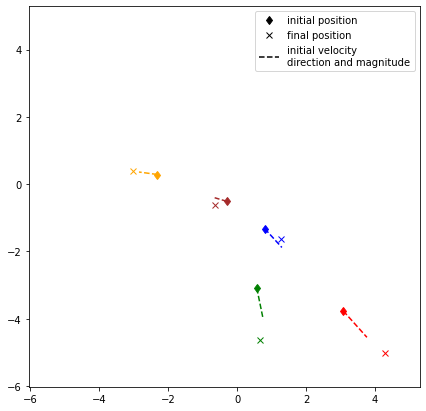

In [7]:
random_idx = np.random.randint(0, 10000)
plot_example(positions_train[random_idx], velocities_train[random_idx])

# Data Handling and Preprocessing

In [8]:
#todo

In [9]:
import torch
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from PIL import Image

def data_transformation(positions, velocities, charges):
    """
    Transform the original set of 6 images to the set of 3 images, 
    (anchor, support image has same character, support image has different character)
    """
    positions_start = positions[:, 0, :, :]
    velocities_start = velocities[:, 0, :, :]
    charges_start = charges[:, :, :]

    temp = np.concatenate((positions_start, velocities_start), axis=1)
    temp = np.moveaxis(temp, 1, 2)
    input_data = np.concatenate((temp,charges_start), axis=2)

    positions_end = np.moveaxis(positions, 2, 3)
    label_data_1 = positions_end[:, 1, :, :]
    label_data_2 = positions_end[:, 2, :, :]
    label_data_3 = positions_end[:, 3, :, :]

    return input_data, label_data_1, label_data_2, label_data_3

class MyDataset(Dataset):
    def __init__(self, input_data, label_data):
        self.input_data = torch.FloatTensor(input_data)
        self.label_data = torch.FloatTensor(label_data)
        
    def __getitem__(self, index):
        input = self.input_data[index, :, :]
        label = self.label_data[index, :, :]
        return input, label
        
    def __len__(self):
        return len(self.label_data)

# Model Implementation

In [10]:
#todo
from sklearn.metrics import r2_score

In [11]:
## Model Definition ##
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        """Embedding extraction, use aggregation function here to utilize neighborhood info""" 
        self.embedding = nn.Sequential(nn.Linear(10, 5), nn.BatchNorm1d(5,momentum=1,affine=True), nn.Sigmoid())

        """Multilayer Perceptron."""
        self.MLP = nn.Sequential(
            nn.Linear(5, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 32),
            nn.BatchNorm1d(32,momentum=1,affine=True),
            nn.ReLU(inplace=True),  
            nn.Linear(32, 2)
        )

    def aggregate(self, x, neighbors):
        """aggregate the info of set for x"""
        neighbors_info = torch.mean(neighbors, axis=1)
        return torch.concat((x,neighbors_info), axis=1)

    def forward(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions

    def predict(self, input):
        """Perform forward"""
        positions = []
        for idx in range(5):
          aggregation = self.aggregate(input[:, idx, :], np.delete(input, idx, axis=1))
          embedding = self.embedding(aggregation)
          position = self.MLP(embedding)
          positions.append(position)
        positions = torch.stack(positions)
        positions = torch.moveaxis(positions, 0, 1)
        return positions
    
    def baseline_predict(self, inputs,predict_time):
      predictions=[]
      for input in inputs:
        prediction = []
        for point in input:
          px = point[0].item()
          py = point[1].item()
          vx = point[2].item()
          vy = point[3].item()
          new_positions = [px+vx*predict_time,py+vy*predict_time]
          prediction.append(new_positions)
        predictions.append(prediction)
      return predictions

    def score(self, labels, prediction,baseline):
      """
      using full accuracy to evaluate our model performance, 
      by predicting one set is correct when all the images in the set is predicted correctly.
      """
      prediction_arr = prediction.detach().numpy()
      labels_arr = labels.detach().numpy()
      baseline_arr = np.array(baseline)
      predict_label_dist = np.linalg.norm(prediction_arr-labels_arr)
      # print(predict_label_dist)
      baseline_label_dist = np.linalg.norm(baseline-labels_arr)
      # print(baseline_label_dist)
      predict_base_ratio = predict_label_dist/baseline_label_dist

      r2_scores=[]
      for i in range(len(prediction_arr)):
        r2_scores.append(r2_score(labels_arr[i], prediction_arr[i]))
      return np.mean(r2_scores), predict_base_ratio



In [12]:
## LOSS Definition ##
class MSELoss(nn.Module):
    """
    Mean squared loss
    """

    def __init__(self):
        super(MSELoss, self).__init__()

    def forward(self, prediction, label):
        error = prediction - label
        squared_error = torch.square(error)
        losses = torch.sum(squared_error)
        return losses.mean()

# Model Training

In [13]:
#todo

In [29]:
import numpy as np
from tqdm import tqdm
import time

class Trainer():
    def __init__(self,
                 device: torch.device,
                 criterion: torch.nn.Module, 
                 epochs: int
                 ):

        self.criterion = criterion
        self.device = device
        self.epochs = epochs


    def run_trainer(self, model, training_DataLoader, valid_DataLoader, optimizer,predict_time):
        avg_losses_per_epoch=[]
        # train_losses=[]
        valid_losses=[]
        valid_score_list = []
        compare_score_list = []
        start = time.time()
        for epoch in tqdm(range(self.epochs)):
            model.train()  # train model
            train_losses=[]
            for batch in training_DataLoader:
                inputs, labels = batch
                # anchor, positive, negative = anchor.to(device=device, dtype=torch.float), positive.to(device=device, dtype=torch.float), negative.to(device=device, dtype=torch.float)
                optimizer.zero_grad()  # zerograd the parameters
                predictions = model(inputs)# one forward pass
                loss = self.criterion(predictions, labels)  # calculate loss
                loss_value = loss.item()
                train_losses.append(loss_value)
                
                loss.backward()  # one backward pass
                optimizer.step()  # update the parameters
            # train_loss,train_r2_scores,comparison_scores,__ = self.evaluation(model,training_DataLoader,predict_time=predict_time)
            valid_loss,valid_r2_scores,comparison_scores,__ = self.evaluation(model,valid_DataLoader,predict_time=predict_time)
            # print(np.mean(train_r2_scores))
            print(np.mean(valid_r2_scores))
            # train_losses.append(train_loss)
            valid_losses.append(valid_loss)

            tic = time.time()
            avg_loss=np.mean(train_losses)
            avg_losses_per_epoch.append(avg_loss)

            valid_score_list.append(np.mean(valid_r2_scores))
            compare_score_list.append(np.mean(comparison_scores))
            print(f'Epoch: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}, train loss: {avg_loss:.4f}, validation loss: {valid_loss:.4f}, Training time so far: {tic-start:.1f} s')
            # train_loss_list = [a.detach().numpy() for a in train_losses]
            # print(f'TRAIN LOSS: {avg_loss:.4f}',end='\n')
            # print(avg_losses_per_epoch)
        # plt.plot(np.linspace(1, self.epochs, self.epochs, endpoint=True), avg_losses_per_epoch)
        # plt.xlabel('Number of epochs')
        # plt.ylabel('Loss')
        # plt.show()
        return avg_losses_per_epoch,valid_losses, valid_score_list, compare_score_list

    
    def evaluation(self, model,testing_DataLoader,predict_time=0.5):
        # accuracies = []
        with torch.no_grad():
          model.eval()
          valid_loss = []
          predictions,r2_scores,compare_scores = [],[],[]
          for batch in testing_DataLoader:
            inputs, labels = batch
            prediction = model.predict(inputs)
            # score, prediction = model.score(labels, prediction,predict_time=predict_time)
            loss = self.criterion(prediction,labels)
            baseline = model.baseline_predict(inputs,predict_time)
            r2_score,compare_score = model.score(labels, prediction,baseline)
            # accuracies.append(cos_sim.detach().numpy())
            valid_loss.append(loss.detach().numpy())
            predictions.append(prediction)
            r2_scores.append(r2_score)
            compare_scores.append(compare_score)
        
        # print(valid_loss)
        # print(np.mean(valid_loss))
        # print(predictions)
        # print()
        # print(f'ACCURACY: {np.mean(accuracies):.4f}',end='\n')

        return np.mean(valid_loss),r2_scores,compare_scores,predictions
    
    

In [58]:
# prepare data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_train, velocities_train, charges_train)
train_dataset_1 = MyDataset(input_data, label_data_1)
train_dataset_2 = MyDataset(input_data, label_data_2)
train_dataset_3 = MyDataset(input_data, label_data_3)

valid_data, valid_label_data_1, valid_label_data_2, valid_label_data_3 = data_transformation(positions_valid, velocities_valid, charges_valid)
valid_dataset_1 = MyDataset(valid_data, valid_label_data_1)
valid_dataset_2 = MyDataset(valid_data, valid_label_data_2)
valid_dataset_3 = MyDataset(valid_data, valid_label_data_3)
valid_DataLoader_1 = torch.utils.data.DataLoader(valid_dataset_1, batch_size=100)
valid_DataLoader_2 = torch.utils.data.DataLoader(valid_dataset_2, batch_size=100)
valid_DataLoader_3 = torch.utils.data.DataLoader(valid_dataset_3, batch_size=100)


# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device=torch.device('cpu')
# criterion
criterion = nn.MSELoss()
# nn.L1Loss
# trainer
trainer = Trainer(device=device,
                  criterion=criterion,
                  epochs=50)


# model one: using data in timpoint 0 to predict timepoint 0.5
model_1 = Network().to(device)
# optimizer
# optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.1,momentum=0.9)
optimizer_1 = torch.optim.Adam(model_1.parameters())
# 这个还比较好： optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.001,momentum=0.5)
# data loader
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=100)
# start training
train_loss,validation_loss, valid_score_list, compare_score_list = trainer.run_trainer(model_1, train_loader_1,valid_DataLoader_1, optimizer_1,predict_time=0.5)




  2%|▏         | 1/50 [00:01<00:51,  1.05s/it]

0.6738288959874278
Epoch: 01/50, train loss: 3.8255, validation loss: 1.6233, Training time so far: 1.0 s


  4%|▍         | 2/50 [00:02<00:50,  1.06s/it]

0.852346274298751
Epoch: 02/50, train loss: 1.0333, validation loss: 0.5188, Training time so far: 2.1 s


  6%|▌         | 3/50 [00:03<00:50,  1.08s/it]

0.8887793620317705
Epoch: 03/50, train loss: 0.4960, validation loss: 0.3190, Training time so far: 3.2 s


  8%|▊         | 4/50 [00:04<00:49,  1.08s/it]

0.9021562035313494
Epoch: 04/50, train loss: 0.3872, validation loss: 0.2690, Training time so far: 4.3 s


 10%|█         | 5/50 [00:05<00:48,  1.08s/it]

0.9095660206282791
Epoch: 05/50, train loss: 0.3491, validation loss: 0.2487, Training time so far: 5.4 s


 12%|█▏        | 6/50 [00:06<00:49,  1.13s/it]

0.9145050359262579
Epoch: 06/50, train loss: 0.3285, validation loss: 0.2373, Training time so far: 6.6 s


 14%|█▍        | 7/50 [00:07<00:47,  1.11s/it]

0.9181210833989322
Epoch: 07/50, train loss: 0.3150, validation loss: 0.2297, Training time so far: 7.7 s


 16%|█▌        | 8/50 [00:08<00:45,  1.09s/it]

0.920767830020057
Epoch: 08/50, train loss: 0.3053, validation loss: 0.2236, Training time so far: 8.7 s


 18%|█▊        | 9/50 [00:09<00:44,  1.09s/it]

0.922770513315901
Epoch: 09/50, train loss: 0.2978, validation loss: 0.2186, Training time so far: 9.8 s


 20%|██        | 10/50 [00:10<00:43,  1.08s/it]

0.9243212026378222
Epoch: 10/50, train loss: 0.2916, validation loss: 0.2144, Training time so far: 10.9 s


 22%|██▏       | 11/50 [00:11<00:42,  1.09s/it]

0.9255532810581399
Epoch: 11/50, train loss: 0.2863, validation loss: 0.2106, Training time so far: 12.0 s


 24%|██▍       | 12/50 [00:13<00:42,  1.12s/it]

0.9265633531788033
Epoch: 12/50, train loss: 0.2817, validation loss: 0.2072, Training time so far: 13.2 s


 26%|██▌       | 13/50 [00:14<00:40,  1.10s/it]

0.9274555830283662
Epoch: 13/50, train loss: 0.2774, validation loss: 0.2040, Training time so far: 14.3 s


 28%|██▊       | 14/50 [00:15<00:39,  1.09s/it]

0.9282144511592048
Epoch: 14/50, train loss: 0.2735, validation loss: 0.2011, Training time so far: 15.3 s


 30%|███       | 15/50 [00:16<00:37,  1.08s/it]

0.9289084915949987
Epoch: 15/50, train loss: 0.2699, validation loss: 0.1982, Training time so far: 16.4 s


 32%|███▏      | 16/50 [00:17<00:36,  1.08s/it]

0.929550285699927
Epoch: 16/50, train loss: 0.2665, validation loss: 0.1954, Training time so far: 17.5 s


 34%|███▍      | 17/50 [00:18<00:35,  1.07s/it]

0.9301479662250879
Epoch: 17/50, train loss: 0.2632, validation loss: 0.1928, Training time so far: 18.5 s


 36%|███▌      | 18/50 [00:19<00:34,  1.07s/it]

0.9307032404489439
Epoch: 18/50, train loss: 0.2601, validation loss: 0.1903, Training time so far: 19.6 s


 38%|███▊      | 19/50 [00:20<00:32,  1.06s/it]

0.9312169121527816
Epoch: 19/50, train loss: 0.2572, validation loss: 0.1878, Training time so far: 20.6 s


 40%|████      | 20/50 [00:21<00:31,  1.06s/it]

0.9316966477905423
Epoch: 20/50, train loss: 0.2543, validation loss: 0.1854, Training time so far: 21.7 s


 42%|████▏     | 21/50 [00:22<00:30,  1.06s/it]

0.9321240523157565
Epoch: 21/50, train loss: 0.2516, validation loss: 0.1831, Training time so far: 22.8 s


 44%|████▍     | 22/50 [00:23<00:30,  1.08s/it]

0.9325414968773764
Epoch: 22/50, train loss: 0.2490, validation loss: 0.1808, Training time so far: 23.9 s


 46%|████▌     | 23/50 [00:25<00:29,  1.10s/it]

0.9329003334130723
Epoch: 23/50, train loss: 0.2465, validation loss: 0.1787, Training time so far: 25.0 s


 48%|████▊     | 24/50 [00:26<00:28,  1.10s/it]

0.9332279990171866
Epoch: 24/50, train loss: 0.2440, validation loss: 0.1766, Training time so far: 26.1 s


 50%|█████     | 25/50 [00:27<00:27,  1.09s/it]

0.9335142734391655
Epoch: 25/50, train loss: 0.2416, validation loss: 0.1745, Training time so far: 27.2 s


 52%|█████▏    | 26/50 [00:28<00:25,  1.08s/it]

0.9338006464473135
Epoch: 26/50, train loss: 0.2393, validation loss: 0.1726, Training time so far: 28.3 s


 54%|█████▍    | 27/50 [00:29<00:26,  1.14s/it]

0.9340667335685394
Epoch: 27/50, train loss: 0.2371, validation loss: 0.1707, Training time so far: 29.5 s


 56%|█████▌    | 28/50 [00:31<00:28,  1.30s/it]

0.9343388553003489
Epoch: 28/50, train loss: 0.2349, validation loss: 0.1688, Training time so far: 31.2 s


 58%|█████▊    | 29/50 [00:32<00:25,  1.23s/it]

0.9346184968139882
Epoch: 29/50, train loss: 0.2328, validation loss: 0.1669, Training time so far: 32.3 s


 60%|██████    | 30/50 [00:33<00:23,  1.18s/it]

0.9348537816351898
Epoch: 30/50, train loss: 0.2308, validation loss: 0.1651, Training time so far: 33.3 s


 62%|██████▏   | 31/50 [00:34<00:21,  1.15s/it]

0.9351326160011804
Epoch: 31/50, train loss: 0.2288, validation loss: 0.1633, Training time so far: 34.4 s


 64%|██████▍   | 32/50 [00:35<00:20,  1.14s/it]

0.935378648693441
Epoch: 32/50, train loss: 0.2269, validation loss: 0.1617, Training time so far: 35.5 s


 66%|██████▌   | 33/50 [00:36<00:19,  1.13s/it]

0.9356404200482256
Epoch: 33/50, train loss: 0.2250, validation loss: 0.1601, Training time so far: 36.6 s


 68%|██████▊   | 34/50 [00:37<00:17,  1.11s/it]

0.935897663070633
Epoch: 34/50, train loss: 0.2232, validation loss: 0.1584, Training time so far: 37.7 s


 70%|███████   | 35/50 [00:38<00:16,  1.12s/it]

0.9361458623060152
Epoch: 35/50, train loss: 0.2215, validation loss: 0.1568, Training time so far: 38.8 s


 72%|███████▏  | 36/50 [00:39<00:15,  1.11s/it]

0.9363742875056001
Epoch: 36/50, train loss: 0.2198, validation loss: 0.1552, Training time so far: 39.9 s


 74%|███████▍  | 37/50 [00:41<00:14,  1.12s/it]

0.9365995582567592
Epoch: 37/50, train loss: 0.2181, validation loss: 0.1537, Training time so far: 41.1 s


 76%|███████▌  | 38/50 [00:42<00:13,  1.10s/it]

0.9368145576437321
Epoch: 38/50, train loss: 0.2165, validation loss: 0.1522, Training time so far: 42.1 s


 78%|███████▊  | 39/50 [00:43<00:11,  1.09s/it]

0.9370097370022193
Epoch: 39/50, train loss: 0.2150, validation loss: 0.1508, Training time so far: 43.2 s


 80%|████████  | 40/50 [00:44<00:10,  1.08s/it]

0.9372131759234069
Epoch: 40/50, train loss: 0.2135, validation loss: 0.1494, Training time so far: 44.3 s


 82%|████████▏ | 41/50 [00:45<00:09,  1.07s/it]

0.9374089873443786
Epoch: 41/50, train loss: 0.2121, validation loss: 0.1481, Training time so far: 45.3 s


 84%|████████▍ | 42/50 [00:46<00:08,  1.08s/it]

0.9376237239594808
Epoch: 42/50, train loss: 0.2107, validation loss: 0.1468, Training time so far: 46.4 s


 86%|████████▌ | 43/50 [00:47<00:07,  1.08s/it]

0.9378175240455983
Epoch: 43/50, train loss: 0.2093, validation loss: 0.1456, Training time so far: 47.5 s


 88%|████████▊ | 44/50 [00:48<00:06,  1.06s/it]

0.9380049013532347
Epoch: 44/50, train loss: 0.2080, validation loss: 0.1443, Training time so far: 48.5 s


 90%|█████████ | 45/50 [00:49<00:05,  1.07s/it]

0.9381766400681653
Epoch: 45/50, train loss: 0.2067, validation loss: 0.1431, Training time so far: 49.6 s


 92%|█████████▏| 46/50 [00:50<00:04,  1.07s/it]

0.9383345542602572
Epoch: 46/50, train loss: 0.2054, validation loss: 0.1420, Training time so far: 50.6 s


 94%|█████████▍| 47/50 [00:51<00:03,  1.09s/it]

0.9385043024603693
Epoch: 47/50, train loss: 0.2042, validation loss: 0.1408, Training time so far: 51.8 s


 96%|█████████▌| 48/50 [00:52<00:02,  1.08s/it]

0.9386618204851993
Epoch: 48/50, train loss: 0.2030, validation loss: 0.1398, Training time so far: 52.9 s


 98%|█████████▊| 49/50 [00:53<00:01,  1.08s/it]

0.9388532418283881
Epoch: 49/50, train loss: 0.2019, validation loss: 0.1388, Training time so far: 53.9 s


100%|██████████| 50/50 [00:54<00:00,  1.10s/it]

0.9390543912029591
Epoch: 50/50, train loss: 0.2007, validation loss: 0.1378, Training time so far: 55.0 s


In [32]:
print(valid_score_list)
compare_score_list

[0.7692455612785853, 0.9035894707167925, 0.9143326041161792, 0.9177519963227722, 0.9232228073453481, 0.9295243653645864, 0.932314692835407, 0.9312019223085143, 0.9385251855253122, 0.9424681951934344, 0.9421667468248888, 0.9460586633131631, 0.9463284921846329, 0.9471356770009385, 0.9489373876538224, 0.9493686304472542, 0.9488783499808386, 0.9487622488611531, 0.9496111774723894, 0.9489423749958321, 0.9489205228640873, 0.9473392262345497, 0.9509509124047225, 0.949056970728565, 0.9484008740361862, 0.9461609877426784, 0.9502978236514001, 0.9482610046503506, 0.9476360788712583, 0.9515976979809153, 0.9508909325559985, 0.9519466655882972, 0.9512809343571489, 0.9481251427328766, 0.9509725480740716, 0.9504775963757737, 0.9483408504102787, 0.9482480241655369, 0.9470599625923457, 0.9524535888964287, 0.9508669453464422, 0.948372932652841, 0.9464831174495654, 0.949400503433741, 0.9492889348486541, 0.9496662765349797, 0.9466336294232482, 0.9475844669813045, 0.9504154501975058, 0.9481832215718461]


[3.8032542329673418,
 2.1864985924577276,
 2.0606011874520607,
 2.010177543622586,
 1.9351681115944117,
 1.8348271553016828,
 1.763287397366517,
 1.7433194717985685,
 1.6515012717414692,
 1.5925738984588929,
 1.5696039234102888,
 1.5012527432364589,
 1.4958632001542662,
 1.4651035384389741,
 1.431098414727932,
 1.411022869586089,
 1.4051503617625531,
 1.3989400114785078,
 1.3926957910143145,
 1.3890110335820958,
 1.38704424093608,
 1.425726188479265,
 1.3847537036357522,
 1.398446086152181,
 1.4082757467818612,
 1.4413933991308405,
 1.4132914065185802,
 1.428959597413392,
 1.4291355174714746,
 1.3968717425867951,
 1.4071032651890407,
 1.3957762581731232,
 1.410553667633108,
 1.4732274834432935,
 1.4247564941774669,
 1.4255875841122232,
 1.463873869319372,
 1.4874111769224516,
 1.4964561375430774,
 1.4116402667198655,
 1.4258841313398058,
 1.4720903902052993,
 1.5010930520378971,
 1.4731153727586603,
 1.4811405622871974,
 1.4722841906969633,
 1.5429469208444797,
 1.5203643926769999,
 1.

In [16]:
len(train_loss)

50

In [17]:
len

<function len>

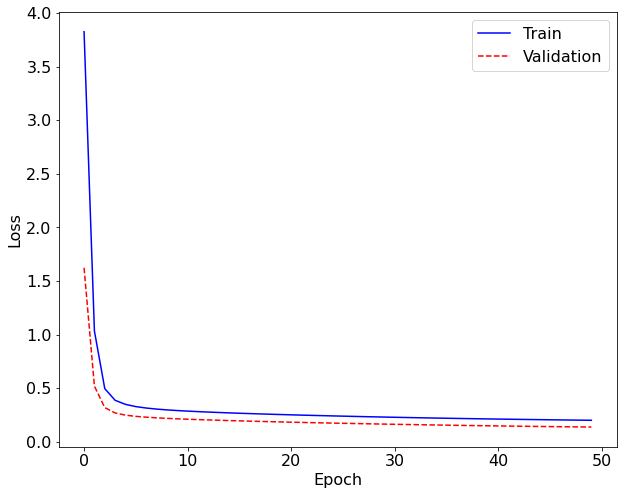

In [59]:
f, ax = plt.subplots(1,1, figsize=(10,8))

fnt=16
ax.plot(train_loss, color='blue', label='Train')
ax.plot(validation_loss, color='red', linestyle='--', label='Validation')
ax.legend(fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.set_xlabel("Epoch", fontsize=fnt)
ax.set_ylabel("Loss", fontsize=fnt);

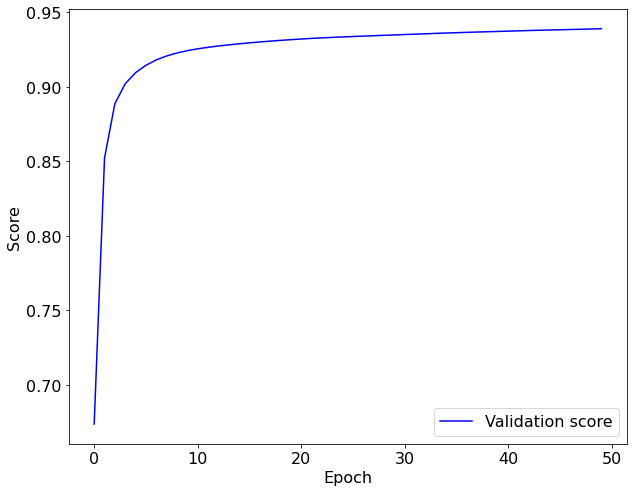

In [60]:
f, ax = plt.subplots(1,1, figsize=(10,8))

fnt=16
ax.plot(valid_score_list, color='blue', label='Validation score')
# ax.plot(validation_loss, color='red', linestyle='--', label='Validation')
ax.legend(fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.set_xlabel("Epoch", fontsize=fnt)
ax.set_ylabel("Score", fontsize=fnt);

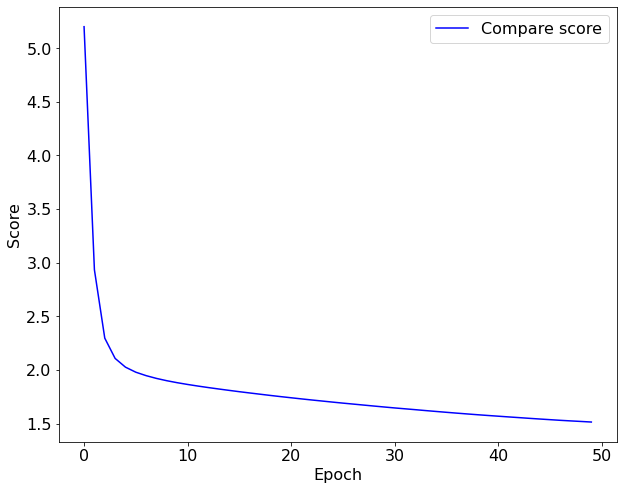

In [61]:
f, ax = plt.subplots(1,1, figsize=(10,8))

fnt=16
ax.plot(compare_score_list, color='blue', label='Compare score')
# ax.plot(validation_loss, color='red', linestyle='--', label='Validation')
ax.legend(fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.set_xlabel("Epoch", fontsize=fnt)
ax.set_ylabel("Score", fontsize=fnt);

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,8))

fnt=16
ax.plot(valid_score_list, color='blue', label='Validation score')
# ax.plot(validation_loss, color='red', linestyle='--', label='Validation')
ax.legend(fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.set_xlabel("Epoch", fontsize=fnt)
ax.set_ylabel("Score", fontsize=fnt);

In [68]:
# model two: using data in timpoint 0 to predict timepoint 1
model_2 = Network().to(device)
# optimizer
# optimizer_2 = torch.optim.SGD(model_2.parameters(), lr=0.0001, momentum=0.5)
# optimizer_2 =torch.optim.SGD(model_2.parameters(),lr=0.001, momentum=0.5)
optimizer_2 =torch.optim.Adam(model_2.parameters())
# data loader
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=100)
# start training
train_loss,validation_loss, valid_score_list, compare_score_list=trainer.run_trainer(model_2, train_loader_2, valid_DataLoader_2, optimizer_2,predict_time=1)

  2%|▏         | 1/50 [00:01<00:52,  1.07s/it]

0.7299431670134461
Epoch: 01/50, train loss: 5.0027, validation loss: 1.9580, Training time so far: 1.1 s


  4%|▍         | 2/50 [00:02<00:52,  1.08s/it]

0.8699127596058525
Epoch: 02/50, train loss: 1.2409, validation loss: 0.6586, Training time so far: 2.2 s


  6%|▌         | 3/50 [00:03<00:51,  1.10s/it]

0.882258515651
Epoch: 03/50, train loss: 0.6301, validation loss: 0.4793, Training time so far: 3.3 s


  8%|▊         | 4/50 [00:04<00:50,  1.09s/it]

0.8840100939734195
Epoch: 04/50, train loss: 0.5313, validation loss: 0.4401, Training time so far: 4.4 s


 10%|█         | 5/50 [00:05<00:49,  1.10s/it]

0.8849786952594773
Epoch: 05/50, train loss: 0.4995, validation loss: 0.4233, Training time so far: 5.5 s


 12%|█▏        | 6/50 [00:06<00:48,  1.10s/it]

0.8861469658541082
Epoch: 06/50, train loss: 0.4818, validation loss: 0.4116, Training time so far: 6.6 s


 14%|█▍        | 7/50 [00:07<00:46,  1.09s/it]

0.8874598214926456
Epoch: 07/50, train loss: 0.4691, validation loss: 0.4019, Training time so far: 7.6 s


 16%|█▌        | 8/50 [00:09<00:51,  1.22s/it]

0.8888954915159155
Epoch: 08/50, train loss: 0.4589, validation loss: 0.3934, Training time so far: 9.1 s


 18%|█▊        | 9/50 [00:10<00:50,  1.23s/it]

0.8903458783189881
Epoch: 09/50, train loss: 0.4500, validation loss: 0.3852, Training time so far: 10.4 s


 20%|██        | 10/50 [00:11<00:47,  1.19s/it]

0.891804617534668
Epoch: 10/50, train loss: 0.4421, validation loss: 0.3777, Training time so far: 11.5 s


 22%|██▏       | 11/50 [00:12<00:44,  1.15s/it]

0.8931832972905356
Epoch: 11/50, train loss: 0.4348, validation loss: 0.3705, Training time so far: 12.6 s


 24%|██▍       | 12/50 [00:13<00:42,  1.13s/it]

0.8944379721904376
Epoch: 12/50, train loss: 0.4280, validation loss: 0.3638, Training time so far: 13.6 s


 26%|██▌       | 13/50 [00:14<00:44,  1.20s/it]

0.8956253855270244
Epoch: 13/50, train loss: 0.4216, validation loss: 0.3573, Training time so far: 15.0 s


 28%|██▊       | 14/50 [00:16<00:41,  1.16s/it]

0.8967424808074973
Epoch: 14/50, train loss: 0.4155, validation loss: 0.3511, Training time so far: 16.1 s


 30%|███       | 15/50 [00:17<00:47,  1.36s/it]

0.8977440304413273
Epoch: 15/50, train loss: 0.4097, validation loss: 0.3453, Training time so far: 17.9 s


 32%|███▏      | 16/50 [00:20<00:58,  1.71s/it]

0.8987282396917695
Epoch: 16/50, train loss: 0.4043, validation loss: 0.3396, Training time so far: 20.4 s


 34%|███▍      | 17/50 [00:21<00:51,  1.55s/it]

0.8997308371780482
Epoch: 17/50, train loss: 0.3992, validation loss: 0.3342, Training time so far: 21.6 s


 36%|███▌      | 18/50 [00:22<00:44,  1.40s/it]

0.9006164294271048
Epoch: 18/50, train loss: 0.3942, validation loss: 0.3291, Training time so far: 22.6 s


 38%|███▊      | 19/50 [00:23<00:40,  1.30s/it]

0.9014382555887532
Epoch: 19/50, train loss: 0.3896, validation loss: 0.3244, Training time so far: 23.7 s


 40%|████      | 20/50 [00:24<00:36,  1.23s/it]

0.9022388553216848
Epoch: 20/50, train loss: 0.3851, validation loss: 0.3200, Training time so far: 24.8 s


 42%|████▏     | 21/50 [00:25<00:34,  1.18s/it]

0.9030962139825327
Epoch: 21/50, train loss: 0.3808, validation loss: 0.3155, Training time so far: 25.8 s


 44%|████▍     | 22/50 [00:26<00:31,  1.14s/it]

0.9038108645638957
Epoch: 22/50, train loss: 0.3766, validation loss: 0.3114, Training time so far: 26.9 s


 46%|████▌     | 23/50 [00:28<00:31,  1.15s/it]

0.9044886620683655
Epoch: 23/50, train loss: 0.3726, validation loss: 0.3075, Training time so far: 28.0 s


 48%|████▊     | 24/50 [00:29<00:29,  1.13s/it]

0.9051899545173427
Epoch: 24/50, train loss: 0.3687, validation loss: 0.3037, Training time so far: 29.1 s


 50%|█████     | 25/50 [00:30<00:27,  1.10s/it]

0.9058436650313008
Epoch: 25/50, train loss: 0.3649, validation loss: 0.3001, Training time so far: 30.2 s


 52%|█████▏    | 26/50 [00:31<00:26,  1.09s/it]

0.9064682119113578
Epoch: 26/50, train loss: 0.3613, validation loss: 0.2967, Training time so far: 31.2 s


 54%|█████▍    | 27/50 [00:32<00:25,  1.09s/it]

0.9070248379944763
Epoch: 27/50, train loss: 0.3577, validation loss: 0.2935, Training time so far: 32.3 s


 56%|█████▌    | 28/50 [00:33<00:23,  1.08s/it]

0.9074997069559124
Epoch: 28/50, train loss: 0.3543, validation loss: 0.2906, Training time so far: 33.4 s


 58%|█████▊    | 29/50 [00:34<00:22,  1.07s/it]

0.9079839713423313
Epoch: 29/50, train loss: 0.3510, validation loss: 0.2878, Training time so far: 34.4 s


 60%|██████    | 30/50 [00:35<00:21,  1.07s/it]

0.9084412185336243
Epoch: 30/50, train loss: 0.3478, validation loss: 0.2850, Training time so far: 35.5 s


 62%|██████▏   | 31/50 [00:36<00:20,  1.07s/it]

0.9088683535487737
Epoch: 31/50, train loss: 0.3447, validation loss: 0.2824, Training time so far: 36.6 s


 64%|██████▍   | 32/50 [00:37<00:19,  1.09s/it]

0.9092997102676079
Epoch: 32/50, train loss: 0.3417, validation loss: 0.2797, Training time so far: 37.7 s


 66%|██████▌   | 33/50 [00:38<00:18,  1.11s/it]

0.9097270968134067
Epoch: 33/50, train loss: 0.3388, validation loss: 0.2770, Training time so far: 38.9 s


 68%|██████▊   | 34/50 [00:39<00:17,  1.11s/it]

0.910118000474408
Epoch: 34/50, train loss: 0.3359, validation loss: 0.2746, Training time so far: 40.0 s


 70%|███████   | 35/50 [00:41<00:16,  1.09s/it]

0.9104776124451132
Epoch: 35/50, train loss: 0.3332, validation loss: 0.2721, Training time so far: 41.0 s


 72%|███████▏  | 36/50 [00:42<00:15,  1.11s/it]

0.910824745347518
Epoch: 36/50, train loss: 0.3306, validation loss: 0.2697, Training time so far: 42.2 s


 74%|███████▍  | 37/50 [00:43<00:14,  1.10s/it]

0.9111934599249514
Epoch: 37/50, train loss: 0.3280, validation loss: 0.2674, Training time so far: 43.2 s


 76%|███████▌  | 38/50 [00:44<00:13,  1.10s/it]

0.9116330534392185
Epoch: 38/50, train loss: 0.3255, validation loss: 0.2650, Training time so far: 44.3 s


 78%|███████▊  | 39/50 [00:45<00:11,  1.09s/it]

0.9121111041803907
Epoch: 39/50, train loss: 0.3232, validation loss: 0.2626, Training time so far: 45.4 s


 80%|████████  | 40/50 [00:46<00:10,  1.10s/it]

0.9125818013236848
Epoch: 40/50, train loss: 0.3208, validation loss: 0.2603, Training time so far: 46.5 s


 82%|████████▏ | 41/50 [00:47<00:10,  1.16s/it]

0.9130333006356146
Epoch: 41/50, train loss: 0.3186, validation loss: 0.2581, Training time so far: 47.8 s


 84%|████████▍ | 42/50 [00:48<00:09,  1.14s/it]

0.9134699397465166
Epoch: 42/50, train loss: 0.3164, validation loss: 0.2562, Training time so far: 48.9 s


 86%|████████▌ | 43/50 [00:50<00:08,  1.17s/it]

0.9138572736649699
Epoch: 43/50, train loss: 0.3143, validation loss: 0.2542, Training time so far: 50.2 s


 88%|████████▊ | 44/50 [00:51<00:06,  1.14s/it]

0.9142481446474371
Epoch: 44/50, train loss: 0.3123, validation loss: 0.2524, Training time so far: 51.2 s


 90%|█████████ | 45/50 [00:52<00:05,  1.12s/it]

0.9146912452117784
Epoch: 45/50, train loss: 0.3104, validation loss: 0.2505, Training time so far: 52.3 s


 92%|█████████▏| 46/50 [00:53<00:04,  1.10s/it]

0.915100699132443
Epoch: 46/50, train loss: 0.3085, validation loss: 0.2486, Training time so far: 53.4 s


 94%|█████████▍| 47/50 [00:54<00:03,  1.10s/it]

0.9154720567377638
Epoch: 47/50, train loss: 0.3066, validation loss: 0.2470, Training time so far: 54.4 s


 96%|█████████▌| 48/50 [00:55<00:02,  1.15s/it]

0.915878745576921
Epoch: 48/50, train loss: 0.3048, validation loss: 0.2452, Training time so far: 55.7 s


 98%|█████████▊| 49/50 [00:56<00:01,  1.14s/it]

0.9163067042916271
Epoch: 49/50, train loss: 0.3030, validation loss: 0.2434, Training time so far: 56.8 s


100%|██████████| 50/50 [00:57<00:00,  1.16s/it]

0.9167259681408254
Epoch: 50/50, train loss: 0.3013, validation loss: 0.2416, Training time so far: 58.0 s


In [74]:
# model three: using data in timpoint 0 to predict timepoint 1.5
model_3 = Network().to(device)
# optimizer
# optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.0001, momentum=0.5)
# optimizer_3 =torch.optim.SGD(model_3.parameters(),lr=0.001, momentum=0.5)# data loader
optimizer_3 =torch.optim.Adam(model_3.parameters())
train_loader_3 = torch.utils.data.DataLoader(train_dataset_3, batch_size=100)
# start training
train_loss,validation_loss, valid_score_list, compare_score_list=trainer.run_trainer(model_3, train_loader_3, valid_DataLoader_3, optimizer_3,predict_time=1.5)

  2%|▏         | 1/50 [00:01<00:57,  1.16s/it]

0.732333566395446
Epoch: 01/50, train loss: 6.1526, validation loss: 1.9645, Training time so far: 1.2 s


  4%|▍         | 2/50 [00:03<01:15,  1.56s/it]

0.842353506067243
Epoch: 02/50, train loss: 1.0130, validation loss: 0.6426, Training time so far: 3.0 s


  6%|▌         | 3/50 [00:04<01:07,  1.43s/it]

0.8551525694831248
Epoch: 03/50, train loss: 0.6551, validation loss: 0.5783, Training time so far: 4.3 s


  8%|▊         | 4/50 [00:05<01:00,  1.31s/it]

0.8624804874671461
Epoch: 04/50, train loss: 0.6046, validation loss: 0.5468, Training time so far: 5.4 s


 10%|█         | 5/50 [00:06<01:01,  1.36s/it]

0.8654680562300289
Epoch: 05/50, train loss: 0.5689, validation loss: 0.5245, Training time so far: 6.8 s


 12%|█▏        | 6/50 [00:08<01:01,  1.40s/it]

0.8656994628141599
Epoch: 06/50, train loss: 0.5413, validation loss: 0.5075, Training time so far: 8.3 s


 14%|█▍        | 7/50 [00:09<01:03,  1.47s/it]

0.8679831830105034
Epoch: 07/50, train loss: 0.5185, validation loss: 0.4845, Training time so far: 10.0 s


 16%|█▌        | 8/50 [00:11<00:59,  1.42s/it]

0.8711702470073936
Epoch: 08/50, train loss: 0.4987, validation loss: 0.4642, Training time so far: 11.2 s


 18%|█▊        | 9/50 [00:12<00:56,  1.38s/it]

0.8750801628055334
Epoch: 09/50, train loss: 0.4821, validation loss: 0.4387, Training time so far: 12.6 s


 20%|██        | 10/50 [00:13<00:51,  1.30s/it]

0.8765062948739001
Epoch: 10/50, train loss: 0.4688, validation loss: 0.4230, Training time so far: 13.7 s


 22%|██▏       | 11/50 [00:14<00:48,  1.23s/it]

0.8791650017570436
Epoch: 11/50, train loss: 0.4577, validation loss: 0.4063, Training time so far: 14.7 s


 24%|██▍       | 12/50 [00:15<00:45,  1.20s/it]

0.8805300805991505
Epoch: 12/50, train loss: 0.4473, validation loss: 0.4005, Training time so far: 15.9 s


 26%|██▌       | 13/50 [00:17<00:45,  1.22s/it]

0.8835536700806251
Epoch: 13/50, train loss: 0.4373, validation loss: 0.3926, Training time so far: 17.1 s


 28%|██▊       | 14/50 [00:18<00:42,  1.19s/it]

0.8874369628213138
Epoch: 14/50, train loss: 0.4289, validation loss: 0.3768, Training time so far: 18.3 s


 30%|███       | 15/50 [00:19<00:41,  1.17s/it]

0.8875923152239948
Epoch: 15/50, train loss: 0.4216, validation loss: 0.3735, Training time so far: 19.4 s


 32%|███▏      | 16/50 [00:20<00:40,  1.20s/it]

0.8865727522540846
Epoch: 16/50, train loss: 0.4151, validation loss: 0.3779, Training time so far: 20.7 s


 34%|███▍      | 17/50 [00:21<00:38,  1.18s/it]

0.8865251578211624
Epoch: 17/50, train loss: 0.4090, validation loss: 0.3814, Training time so far: 21.8 s


 36%|███▌      | 18/50 [00:22<00:36,  1.15s/it]

0.8881011994152532
Epoch: 18/50, train loss: 0.4030, validation loss: 0.3758, Training time so far: 22.9 s


 38%|███▊      | 19/50 [00:24<00:35,  1.15s/it]

0.8906013867407603
Epoch: 19/50, train loss: 0.3972, validation loss: 0.3671, Training time so far: 24.0 s


 40%|████      | 20/50 [00:25<00:34,  1.15s/it]

0.8882996221827636
Epoch: 20/50, train loss: 0.3917, validation loss: 0.3822, Training time so far: 25.2 s


 42%|████▏     | 21/50 [00:26<00:33,  1.14s/it]

0.8907263345840221
Epoch: 21/50, train loss: 0.3862, validation loss: 0.3803, Training time so far: 26.3 s


 44%|████▍     | 22/50 [00:27<00:31,  1.13s/it]

0.889918422946643
Epoch: 22/50, train loss: 0.3813, validation loss: 0.3933, Training time so far: 27.4 s


 46%|████▌     | 23/50 [00:28<00:30,  1.12s/it]

0.8900520993224112
Epoch: 23/50, train loss: 0.3768, validation loss: 0.3983, Training time so far: 28.5 s


 48%|████▊     | 24/50 [00:29<00:30,  1.16s/it]

0.8921110071216718
Epoch: 24/50, train loss: 0.3733, validation loss: 0.3864, Training time so far: 29.7 s


 50%|█████     | 25/50 [00:30<00:28,  1.15s/it]

0.8898034025491555
Epoch: 25/50, train loss: 0.3704, validation loss: 0.4052, Training time so far: 30.9 s


 52%|█████▏    | 26/50 [00:31<00:27,  1.14s/it]

0.8919160995919586
Epoch: 26/50, train loss: 0.3681, validation loss: 0.3962, Training time so far: 32.0 s


 54%|█████▍    | 27/50 [00:33<00:26,  1.13s/it]

0.8929191924542241
Epoch: 27/50, train loss: 0.3662, validation loss: 0.3886, Training time so far: 33.1 s


 56%|█████▌    | 28/50 [00:34<00:25,  1.14s/it]

0.8947875323119201
Epoch: 28/50, train loss: 0.3646, validation loss: 0.3775, Training time so far: 34.3 s


 58%|█████▊    | 29/50 [00:35<00:23,  1.12s/it]

0.8929793499832966
Epoch: 29/50, train loss: 0.3631, validation loss: 0.3913, Training time so far: 35.3 s


 60%|██████    | 30/50 [00:36<00:22,  1.12s/it]

0.8919253104472353
Epoch: 30/50, train loss: 0.3618, validation loss: 0.3953, Training time so far: 36.5 s


 62%|██████▏   | 31/50 [00:37<00:21,  1.12s/it]

0.8955443629417793
Epoch: 31/50, train loss: 0.3607, validation loss: 0.3723, Training time so far: 37.6 s


 64%|██████▍   | 32/50 [00:38<00:20,  1.12s/it]

0.8938662277476557
Epoch: 32/50, train loss: 0.3595, validation loss: 0.3765, Training time so far: 38.7 s


 66%|██████▌   | 33/50 [00:39<00:19,  1.13s/it]

0.8929101265816668
Epoch: 33/50, train loss: 0.3585, validation loss: 0.3782, Training time so far: 39.9 s


 68%|██████▊   | 34/50 [00:41<00:18,  1.18s/it]

0.8961509836827238
Epoch: 34/50, train loss: 0.3576, validation loss: 0.3747, Training time so far: 41.1 s


 70%|███████   | 35/50 [00:42<00:17,  1.17s/it]

0.8949549337929307
Epoch: 35/50, train loss: 0.3568, validation loss: 0.3734, Training time so far: 42.3 s


 72%|███████▏  | 36/50 [00:43<00:16,  1.16s/it]

0.8952740101799017
Epoch: 36/50, train loss: 0.3560, validation loss: 0.3749, Training time so far: 43.4 s


 74%|███████▍  | 37/50 [00:44<00:14,  1.15s/it]

0.8939447940594538
Epoch: 37/50, train loss: 0.3553, validation loss: 0.3836, Training time so far: 44.5 s


 76%|███████▌  | 38/50 [00:45<00:13,  1.14s/it]

0.8942421695173817
Epoch: 38/50, train loss: 0.3546, validation loss: 0.3777, Training time so far: 45.7 s


 78%|███████▊  | 39/50 [00:46<00:12,  1.13s/it]

0.8959107166778513
Epoch: 39/50, train loss: 0.3540, validation loss: 0.3761, Training time so far: 46.8 s


 80%|████████  | 40/50 [00:47<00:11,  1.13s/it]

0.8946321032421732
Epoch: 40/50, train loss: 0.3534, validation loss: 0.3722, Training time so far: 47.9 s


 82%|████████▏ | 41/50 [00:49<00:10,  1.13s/it]

0.8960138073734452
Epoch: 41/50, train loss: 0.3528, validation loss: 0.3755, Training time so far: 49.0 s


 84%|████████▍ | 42/50 [00:50<00:09,  1.13s/it]

0.892007946620593
Epoch: 42/50, train loss: 0.3522, validation loss: 0.3860, Training time so far: 50.1 s


 86%|████████▌ | 43/50 [00:51<00:08,  1.19s/it]

0.8970109881561334
Epoch: 43/50, train loss: 0.3517, validation loss: 0.3659, Training time so far: 51.5 s


 88%|████████▊ | 44/50 [00:52<00:07,  1.18s/it]

0.8937283328243909
Epoch: 44/50, train loss: 0.3511, validation loss: 0.3771, Training time so far: 52.6 s


 90%|█████████ | 45/50 [00:53<00:05,  1.19s/it]

0.8942278041570866
Epoch: 45/50, train loss: 0.3506, validation loss: 0.3779, Training time so far: 53.9 s


 92%|█████████▏| 46/50 [00:54<00:04,  1.16s/it]

0.8946887414139872
Epoch: 46/50, train loss: 0.3501, validation loss: 0.3752, Training time so far: 54.9 s


 94%|█████████▍| 47/50 [00:56<00:03,  1.14s/it]

0.894154766751274
Epoch: 47/50, train loss: 0.3496, validation loss: 0.3781, Training time so far: 56.0 s


 96%|█████████▌| 48/50 [00:57<00:02,  1.19s/it]

0.8948010638081507
Epoch: 48/50, train loss: 0.3492, validation loss: 0.3763, Training time so far: 57.4 s


 98%|█████████▊| 49/50 [00:58<00:01,  1.18s/it]

0.8938561652080527
Epoch: 49/50, train loss: 0.3488, validation loss: 0.3862, Training time so far: 58.5 s


100%|██████████| 50/50 [00:59<00:00,  1.19s/it]

0.8957107216232082
Epoch: 50/50, train loss: 0.3483, validation loss: 0.3750, Training time so far: 59.7 s



# Evaluation

In [65]:
# prepare test data
input_data, label_data_1, label_data_2, label_data_3 = data_transformation(positions_test, velocities_test, charges_test)
test_dataset_1 = MyDataset(input_data, label_data_1)
test_dataset_2 = MyDataset(input_data, label_data_2)
test_dataset_3 = MyDataset(input_data, label_data_3)
# data loader
test_DataLoader_1 = torch.utils.data.DataLoader(test_dataset_1, batch_size=100)
test_DataLoader_2 = torch.utils.data.DataLoader(test_dataset_2, batch_size=100)
test_DataLoader_3 = torch.utils.data.DataLoader(test_dataset_3, batch_size=100)

In [70]:
# MSE loss

# evaluation model1
__, r2_scores_1, compare_scores_1, predictions_1 = trainer.evaluation(model_1, test_DataLoader_1)
# # evaluation model2
__,r2_scores_2, compare_scores_2, predictions_2 = trainer.evaluation(model_2, test_DataLoader_2)
# evaluation model3
__,r2_scores_3, compare_scores_3, predictions_3 = trainer.evaluation(model_3, test_DataLoader_3)

In [71]:
print(np.mean(r2_scores_1),np.mean(compare_scores_1))
print(np.mean(r2_scores_2),np.mean(compare_scores_2))
print(np.mean(r2_scores_3),np.mean(compare_scores_3))

# print(np.mean(score_list_2))
# print(np.mean(score_list_3))

0.9534190245277528 1.5784617822282079
0.9106446392351921 1.0149828144911566
0.8886638244289287 0.7608306822835026


In [72]:
def plot_example(test_example,prediction): # initial position and velocities, and positions in the end
    fig = plt.figure()
    axes = plt.gca()
    axes.set_xlim([-5., 5.])
    axes.set_ylim([-5., 5.])
    initial=test_example[0]
    label=test_example[1]
    pred_list = prediction.tolist()
    test_arr = test_example[0].detach().numpy()
    pos = np.hstack((test_arr[:,:2],prediction))

    colors = ['red', 'blue', 'green', 'orange', 'brown']
    for i in range(initial.shape[-1]):
        plt.plot(initial[i,0], initial[i, 1], 'd', color=colors[i])
        plt.plot(label[i,0], label[i,1], 'x', color=colors[i]) # the correct label
        plt.plot(pred_list[i][0],pred_list[i][1], 'o',color=colors[i])
        plt.plot([initial[i,0], initial[i,0] + initial[i,2]], [initial[i, 1], initial[i, 1] + initial[i,3]], '--', color=colors[i])
    fig.set_size_inches(7, 7)
    plt.xlim(np.min(pos)-1, np.max(pos) +1)
    plt.ylim(np.min(pos)-1, np.max(pos) +1)
    plt.plot([], [], 'd', color='black', label='initial position')
    plt.plot([], [], 'o', color='black', label='predicted final position')
    plt.plot([], [], 'x', color='black', label='actual final position')
    plt.plot([], [], '--', color='black', label='initial velocity \ndirection and magnitude')
    plt.legend()
    
    plt.show()
    return

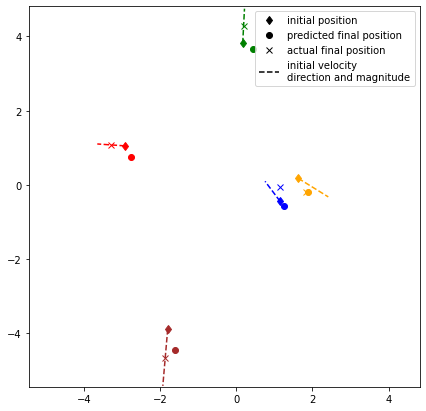

In [49]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_1[random_idx],predictions_1[n_batch][idx_in_batch])

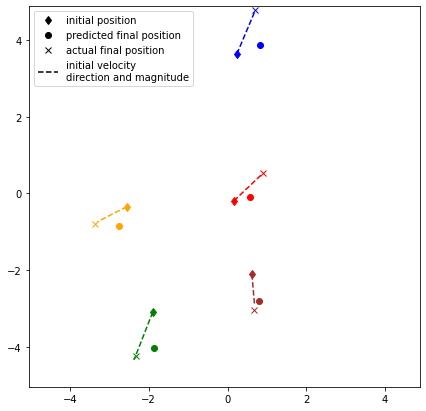

In [50]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_2[random_idx],predictions_2[n_batch][idx_in_batch])

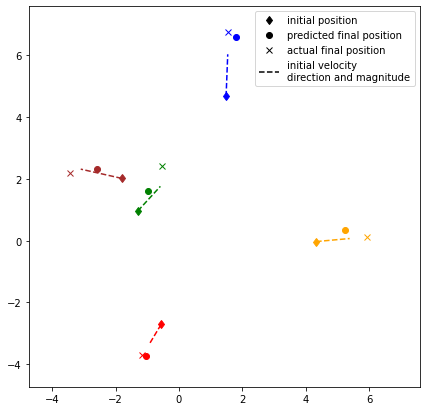

In [51]:
random_idx = np.random.randint(0, 2000)
n_batch = int(random_idx/100)
idx_in_batch = int(random_idx%100)
plot_example(test_dataset_3[random_idx],predictions_3[n_batch][idx_in_batch])